In [1]:
# Developer: Ayush Oturkar
# Date: Nov 5, 2022
# EG Game Analysis


#LOADING REQUIRED LIBRARIES
#Data Visualization libraries
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline


#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

#Import warnings
import warnings
warnings.filterwarnings("ignore")

# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Lets look at the snapshot of the dataset quickly.
gamedf = pd.read_csv('starcraft_player_data.csv')
gamedf.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


# Task 1

Determine if this dataset needs any preprocessing. If so, clean the dataset and
document your steps. If not, explain how you came to that conclusion?

In [3]:
# Funtion to check the missing value count and percentage
def missing_val_check(data):
    """
    Input::data - A pandas dataframe
    Output::Missing value report by column
    """
    # Missing data check
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat(
        [total, percent * 100], axis=1, keys=["Total", "Percent(%)"]
    )
    return missing_data


# Converting blank spaces to null to capture the duplicates from our data
gamedf.replace(r"^\s*$", np.nan, regex=True, inplace=True)
missing_val_check(gamedf)

,Total,Percent(%)
GameID,0,0.0
LeagueIndex,0,0.0
ComplexUnitsMade,0,0.0
UniqueUnitsMade,0,0.0
WorkersMade,0,0.0
TotalMapExplored,0,0.0
ActionsInPAC,0,0.0
ActionLatency,0,0.0
GapBetweenPACs,0,0.0
NumberOfPACs,0,0.0


### Takeaway:


Clearly we cant find any missing values in the data. This is a good thing to start with but lets **double check** the data again

In [4]:
# Lets see if there is any categorical feature and look at its statistics
display(gamedf.describe(include=["O"]))

,Age,HoursPerWeek,TotalHours
count,3395,3395,3395
unique,29,33,238
top,20,10,500
freq,357,411,328


### Takeaway:

**Age, HourPerWeek, TotalHours should be numeric data dtype**. Being an object data type implies that something might be wrong is what we can suspect. Some unwanted characters might be in there is our hypothesis. 

Lets look the unique values of Age, HoursPerWeek, TotalHours and see if we can detect any anomoly.

In [5]:
gamedf["Age"].unique()

array(['27', '23', '30', '19', '32', '21', '17', '20', '18', '16', '26',
       '38', '28', '25', '22', '29', '24', '35', '31', '33', '37', '40',
       '34', '43', '41', '36', '44', '39', '?'], dtype=object)

In [6]:
gamedf["HoursPerWeek"].unique()

array(['10', '20', '6', '8', '42', '14', '24', '16', '4', '12', '30',
       '28', '70', '2', '56', '36', '40', '18', '96', '50', '168', '48',
       '84', '0', '72', '112', '90', '32', '98', '140', '?', '80', '60'],
      dtype=object)

In [7]:
gamedf["TotalHours"].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', '?', '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',
 

 ### Takeaway:
 
Clearly we can see that there is **"?"** in the data because of which pandas treats the above three variables as object. These three columns should be treated as numeric for any kind of analysis. Hence we will be converting it back to numeric and replacing "?" will null value and will treat it.

### Cleaning Age, HoursPerWeek and TotalHours variables as below

In [8]:
inval_dtypecol = ["Age", "HoursPerWeek", "TotalHours"]

# Replacing '?' as null value
gamedf[inval_dtypecol] = gamedf[inval_dtypecol].apply(lambda x: x.replace("?", np.nan))

# Converting the dtype of these features to numeric
for col in inval_dtypecol:
    gamedf[col] = pd.to_numeric(gamedf[col])

In [9]:
missing_val_check(gamedf)

,Total,Percent(%)
TotalHours,57,1.678940
HoursPerWeek,56,1.649485
Age,55,1.620029
GameID,0,0.000000
GapBetweenPACs,0,0.000000
ComplexUnitsMade,0,0.000000
UniqueUnitsMade,0,0.000000
WorkersMade,0,0.000000
TotalMapExplored,0,0.000000
ActionsInPAC,0,0.000000


We can see that Age, TotalHours and HoursperWeek are missing and roughly 1% of the data is missing, which can be simply imputed. Lets fix the missing values of Age, Hoursperweek and TotalHours by imuputing them intelligently.

In [10]:
gamedf[gamedf["Age"].isnull()].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3340,10001,8,NaN,NaN,NaN,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.0
3341,10005,8,NaN,NaN,NaN,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.0
3342,10006,8,NaN,NaN,NaN,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.0
3343,10015,8,NaN,NaN,NaN,274.2552,0.018121,0.001264,8,0.000053,0.000975,0.007111,10.6419,24.3556,4.3870,28,0.001106,6,0.000000,0.0
3344,10016,8,NaN,NaN,NaN,274.3404,0.023131,0.000739,8,0.000622,0.003552,0.005355,19.1568,36.3098,5.2811,28,0.000739,6,0.000000,0.0


Looks like the missing value for Age corresponds to leagueindex = 8. Lets confirm

In [11]:
print(
    "Total missing values for LeagueIndex = 8 and Age as null value:",
    gamedf[(gamedf["LeagueIndex"] == 8) & (gamedf["Age"].isnull())].shape[0],
)

Total missing values for LeagueIndex = 8 and Age as null value: 55


### Takeaway:

1. All the missing value corresponding to Age, belongs to LeagueIndex = 8
2. Lets look at the distribution of Age by leagueIndex so that we can impute the missing value with median value of leagueIndex = 7

<AxesSubplot:xlabel='LeagueIndex', ylabel='Age'>

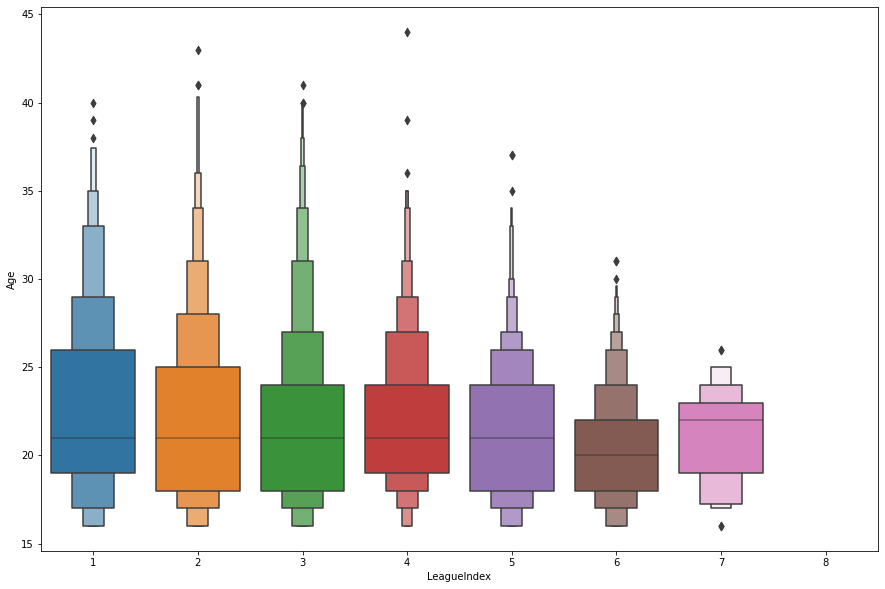

In [12]:
# Can also be taken as part of task 2 in the code below
plt.figure(figsize=(15, 10))
sns.boxenplot(data=gamedf, x="LeagueIndex", y="Age", k_depth="trustworthy")

### Takeaway:
Clearly we can see in the higher league index we have more younger players which is kindoff understandable as young players tend to have higher stamina, reflexes and muscle memory for gaming as compared to the senior level players. Hence its an better idea to replace the age group of league index as median of 7.

**Imputing missing value for Age with median value of age for LeagueIndex = 7**

In [13]:
med_val = gamedf[gamedf["LeagueIndex"] == 7]["Age"].median()
gamedf["Age"] = gamedf["Age"].fillna(med_val)

Let now check the distribution of hoursperweek for different leagueindex

<AxesSubplot:xlabel='LeagueIndex', ylabel='HoursPerWeek'>

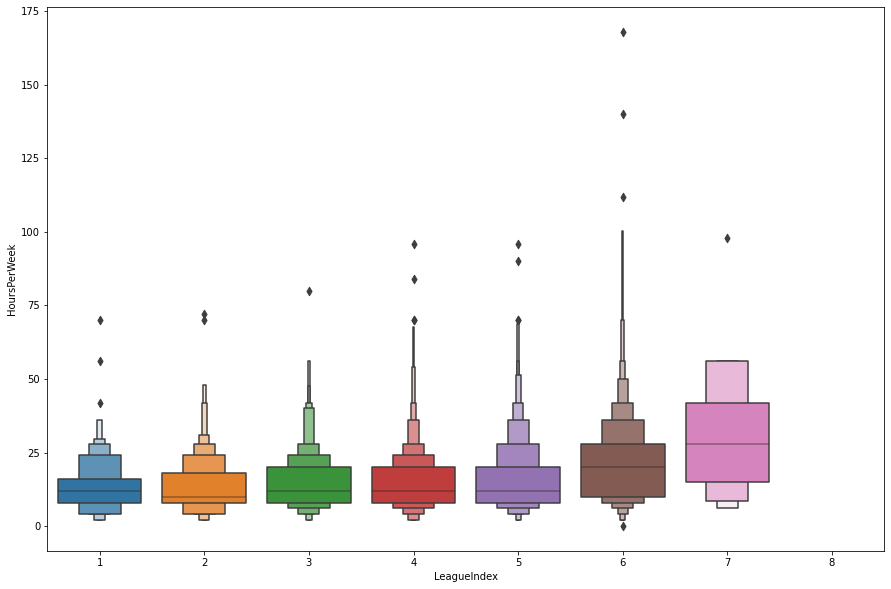

In [14]:
# Can also be taken as part of task 2 in the code below
plt.figure(figsize=(15, 10))
sns.boxenplot(data=gamedf, x="LeagueIndex", y="HoursPerWeek", k_depth="trustworthy")

### Takeaway:

Highly league player tends to spend more time playing. Hence we take roughly the same value as the median value of leagueindex =7 for imputing the missing value for HoursPerWeek.

In [15]:
gamedf[gamedf["HoursPerWeek"].isnull()]["LeagueIndex"].unique()

array([5, 8])

As there is one extra missing value of hoursperweek for a player with LeagueIndex. Imputing this with median of hourspweweek of players in leagueindex=5

**Imputing missing value for HoursPerWeek**

In [16]:
# First imputing the missing value for player with missing hoursperweek for leagueindex = 5
med_val_l5 = gamedf[gamedf["LeagueIndex"] == 5]["HoursPerWeek"].median()
gamedf.loc[
    (gamedf["HoursPerWeek"].isnull()) & (gamedf["LeagueIndex"] == 5), "HoursPerWeek"
] = med_val_l5

# Now imputing the missing value for player with missing hoursperweek for leagueindex = 8
med_val_l8 = gamedf[gamedf["LeagueIndex"] == 7]["HoursPerWeek"].median()
gamedf.loc[
    (gamedf["HoursPerWeek"].isnull()) & (gamedf["LeagueIndex"] == 8), "HoursPerWeek"
] = med_val_l8

Now lets look at **Total Hours** trend:

<AxesSubplot:xlabel='LeagueIndex', ylabel='TotalHours'>

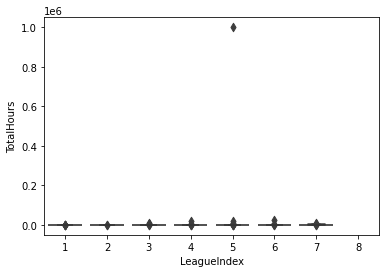

In [17]:
sns.boxenplot(data=gamedf, x="LeagueIndex", y="TotalHours", k_depth="trustworthy")

As we cant any significant trend in this. Lets impute the missing value of totalhours by taking median value of players in the league 5, 6 and 7. But lets check the player leagueindex with missing total hours other than leagueindex = 8

In [18]:
gamedf[gamedf["TotalHours"].isnull()]["LeagueIndex"].unique()

array([5, 8])

Now we can impute the missing values as median of total hours from league 5,6,7

**Imputing missing value for TotalHours**

In [20]:
med_val_l6l7 = gamedf[gamedf["LeagueIndex"].between(5, 7)]["TotalHours"].median()
gamedf.loc[gamedf["TotalHours"].isnull(), "TotalHours"] = med_val_l6l7
print("Total missing values now are {}".format(gamedf.isnull().sum().sum()))

Total missing values now are 0


##### Missing values treated successfully

In [21]:
# Now Lets look at the data statistics
gamedf.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.653608,16.105449,956.553166,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,4.172356,11.961811,17172.120355,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


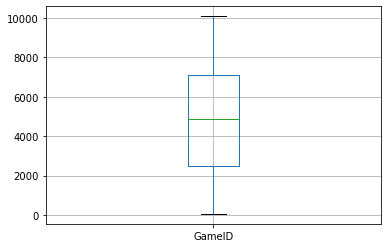

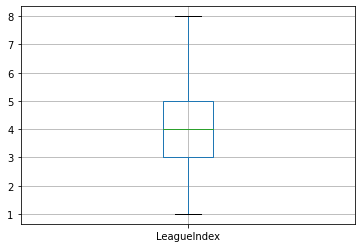

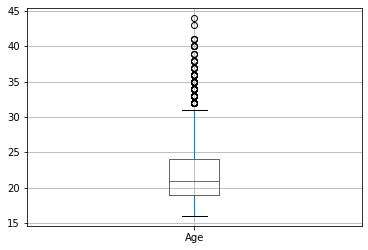

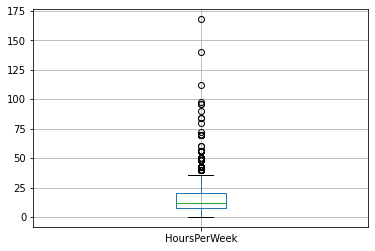

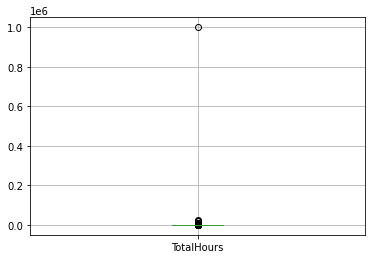

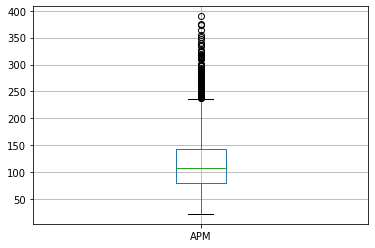

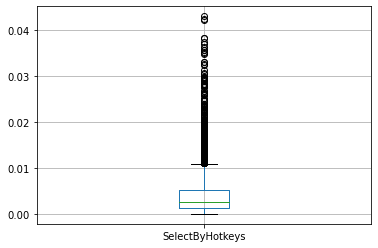

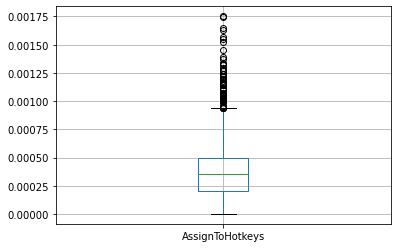

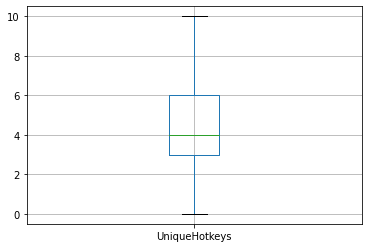

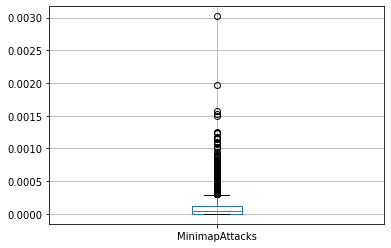

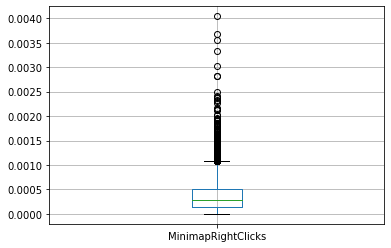

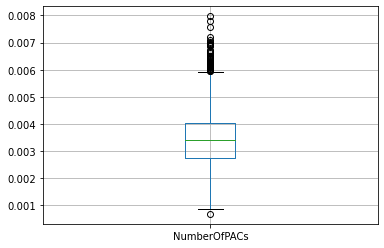

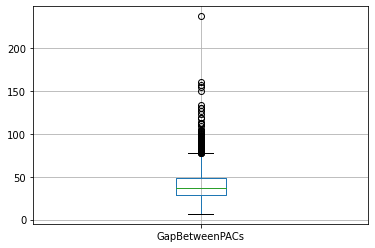

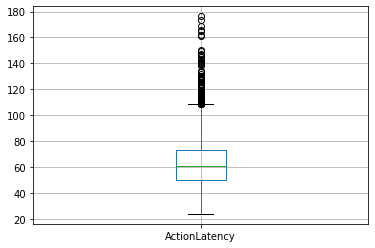

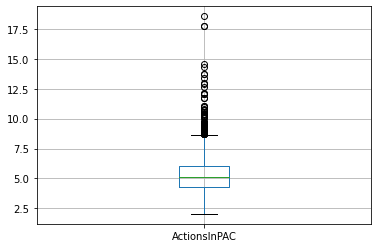

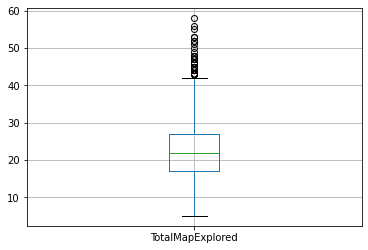

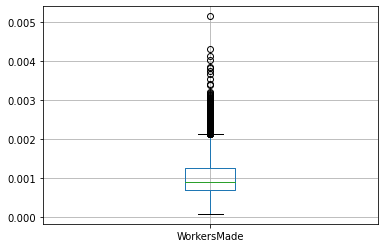

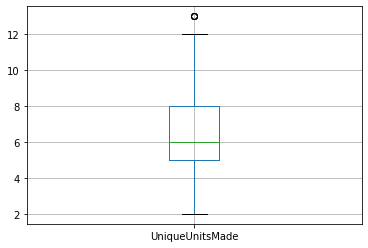

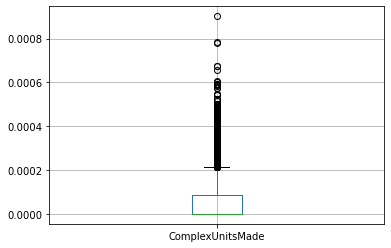

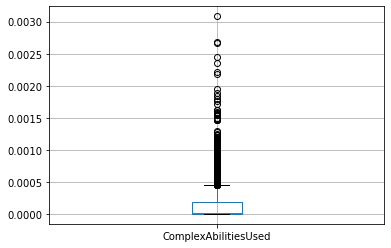

In [22]:
# In addition to the above description lets print the boxplots -
# - for all the features for better visual representation of the data spread.
for i in gamedf.columns:
    gamedf.boxplot(column=i)
    plt.show()

<AxesSubplot:>

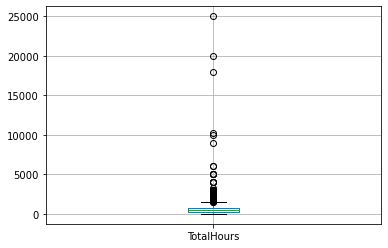

In [23]:
gamedf[gamedf["TotalHours"] < 1000000].boxplot(column="TotalHours")

In [24]:
print(
    "On average total hours a player can play considering 20 years of period",
    gamedf["HoursPerWeek"].median() * 7 * 4 * 20,
)

On average total hours a player can play considering 20 years of period 6720.0


### Takeaways

1) Clearly we can identify few outliers in the data. Some can be genuine & some might be incorrectly entered into the system. Outlier treatment is a crucial step. We need to verify with business before taking any call. If there is some value which is impossible can be treated directly.

2) For example if we look closely at HoursPerWeek the outlier value is 168 which is equal to 24 * 7 i.e. 168. This is impossible that any player can play 24 hours, 7 days a week. A player will atleast take 2 hours break in a day (my assumption). Hence we will replace all the values >154 as 154.

3) Next if we look at TotalHours which comes out to be 1000000 hours. This also clearly looks like an anomoly. As we saw in the last code 6720 is the average total hour a player can be assumed to play, however some players can play long hours for a long time. Hence keeping this in mind and keeping a reasonable leeway, we can just replace the values greater than 25000 hours to 25000. Again this should be confirmed with a massive dataset of players histories of total hours played so that we pass nearly correct value for our model for better fit.

4) Rest some other feetures are players attributes which are having outliers which is possible given some players are really good in their reflexes and other abilities, unless we verify it with some scientific fact to report any anomoly entry for treatment.

5) We can also notice that minimum value of ComplexUnitsMade and ComplexAbilitiesUsed have 0 as minimum value which can be highlighting point. But again this maybe possible during a game so I am keeping this as it is for now. In really life we need to check from business if a 0 value is possible.

## Outlier Treatment

In [25]:
# 1. Replacing the hoursperweek values with values greater than 154 as 154
gamedf.loc[gamedf["HoursPerWeek"] > 154, "HoursPerWeek"] = 154

# 2. Replacing anomolous Total hours as mentioned in the takeaway above
gamedf.loc[gamedf["TotalHours"] > 25000, "TotalHours"] = 25000

**Outliers treated successfully**

**Data is now cleaned with missing value fix, data type correction and outlier treatment**

# Task 2

Multicollinearity has a negative impact on many popular ML models. Check if this dataset
experiences any multicollinearity. If so, reduce the impact until an acceptable point.

<AxesSubplot:>

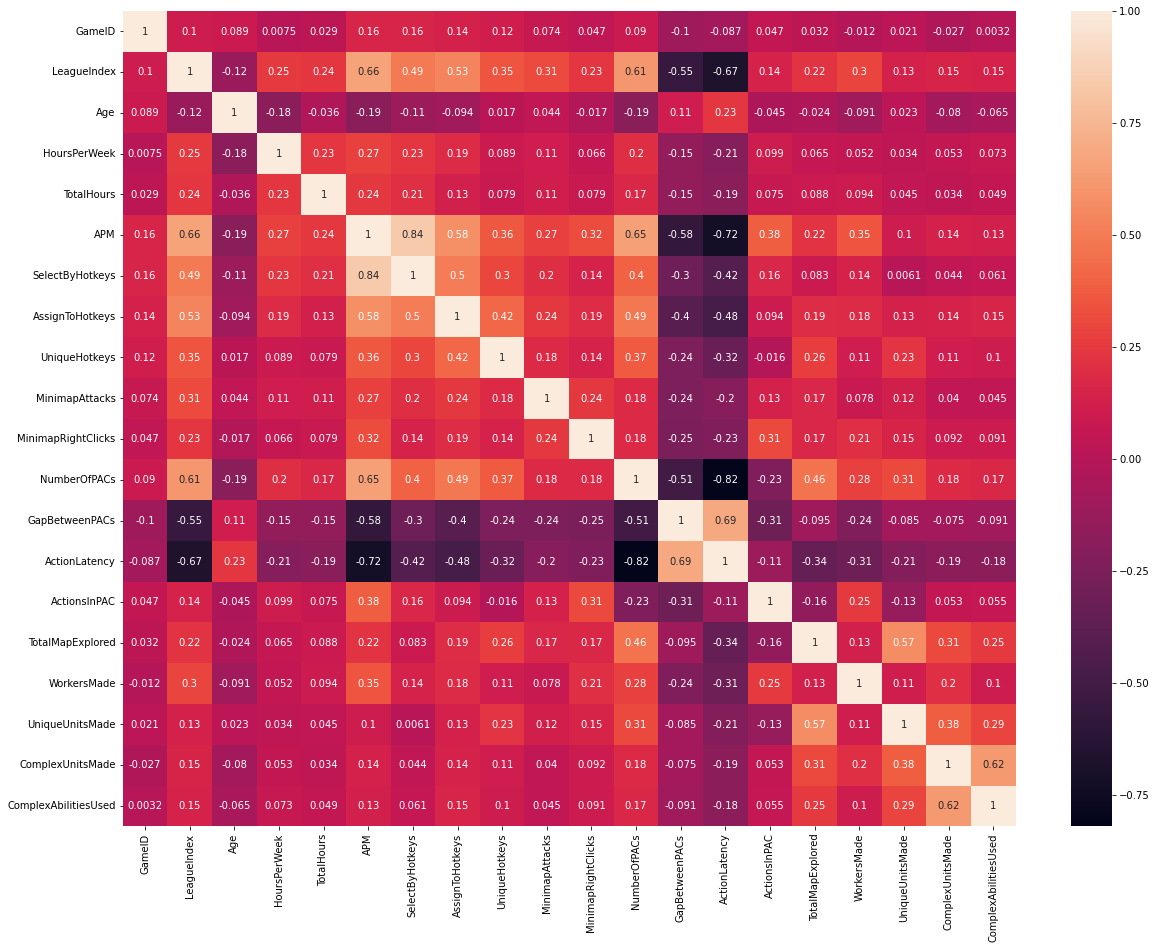

In [26]:
# Lets plot the correlation heatmap to have a rough idea of collinearity between features
plt.figure(figsize=(20, 15))
corr = gamedf.corr()
sns.heatmap(corr, annot=True)

### Takeaway

We can clearly see the presence of high correlation between different features. As a rule of thumb any correlation value greater than 0.5 or less than -0.5 is considered as high. Leaving our target i.e. LeagueIndex we can clearly see that **multicollinearity exists**. 

We can print the VIF scores for all the features except the target feature to get better idea.

A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.

In [27]:
gamedf_indpt = gamedf.drop(["LeagueIndex"], axis=1)
vif_data = pd.DataFrame()
vif_data["feature"] = gamedf_indpt.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(gamedf_indpt.values, i)
    for i in range(len(gamedf_indpt.columns))
]

In [28]:
vif_data

,feature,VIF
0,GameID,4.344642
1,Age,29.901522
2,HoursPerWeek,3.258198
3,TotalHours,1.659728
4,APM,232.216165
5,SelectByHotkeys,23.242555
6,AssignToHotkeys,6.506955
7,UniqueHotkeys,5.906091
8,MinimapAttacks,1.582149
9,MinimapRightClicks,2.637249


### Takeaways

As a general rule of thumb VIF > 10 implies series multicollinearity amongst the features which requires serious checks. This means there is serious multicollinearity in our game data.

But note that collinearity with our target feature i.e. league index is a positive thing as from this we can build hypothesis that the feature has high predictibility power.

Now we need to remove/combine the multicollinear features in order to get correct explainability from our model. If we keep multicollinear fetures, it doesnt affect the accuracy of our models to a large extent but the beta estimates/elasticities might not be accurate. 

Another point, with presence of correlated predictors, the standard errors tend to increase. And, with large standard errors, the confidence interval becomes wider leading to less precise estimates of slope parameters if we are intending to fit linear models.

### Action taken to remove multicollinearity
We need to see if we can remove multicollinear features without losing any useful information for our future modelling process. 
We can experimentally try :

**Action 1:** Removing **ActionsinPAC and UniqueUnitsMade** as we can see in the heatmap above this feature is weakly correlated with our target but has high VIF. Also we can remove **SelectByHotkeys** as this is highly correlated with **AssignToHotkeys** where AssignToHotkeys is better correlated with our target.

**Action 2:** Also we can remove **APM** as this is clearly highly correlated with **ActionLatency** and ActionLatency is slighly more correlated to our target. Also APM have significantly high VIF value

In [29]:
# Action 1
gamedf_indpt = gamedf.drop(
    ["LeagueIndex", "ActionsInPAC", "UniqueUnitsMade", "SelectByHotkeys"], axis=1
)
vif_data = pd.DataFrame()
vif_data["feature"] = gamedf_indpt.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(gamedf_indpt.values, i)
    for i in range(len(gamedf_indpt.columns))
]
vif_data.sort_values(["VIF"], ascending=False)

,feature,VIF
9,NumberOfPACs,28.636327
1,Age,27.808250
11,ActionLatency,26.669067
4,APM,16.096429
12,TotalMapExplored,14.782565
10,GapBetweenPACs,14.037619
5,AssignToHotkeys,6.379987
13,WorkersMade,5.880248
6,UniqueHotkeys,5.839240
0,GameID,4.339998


<AxesSubplot:>

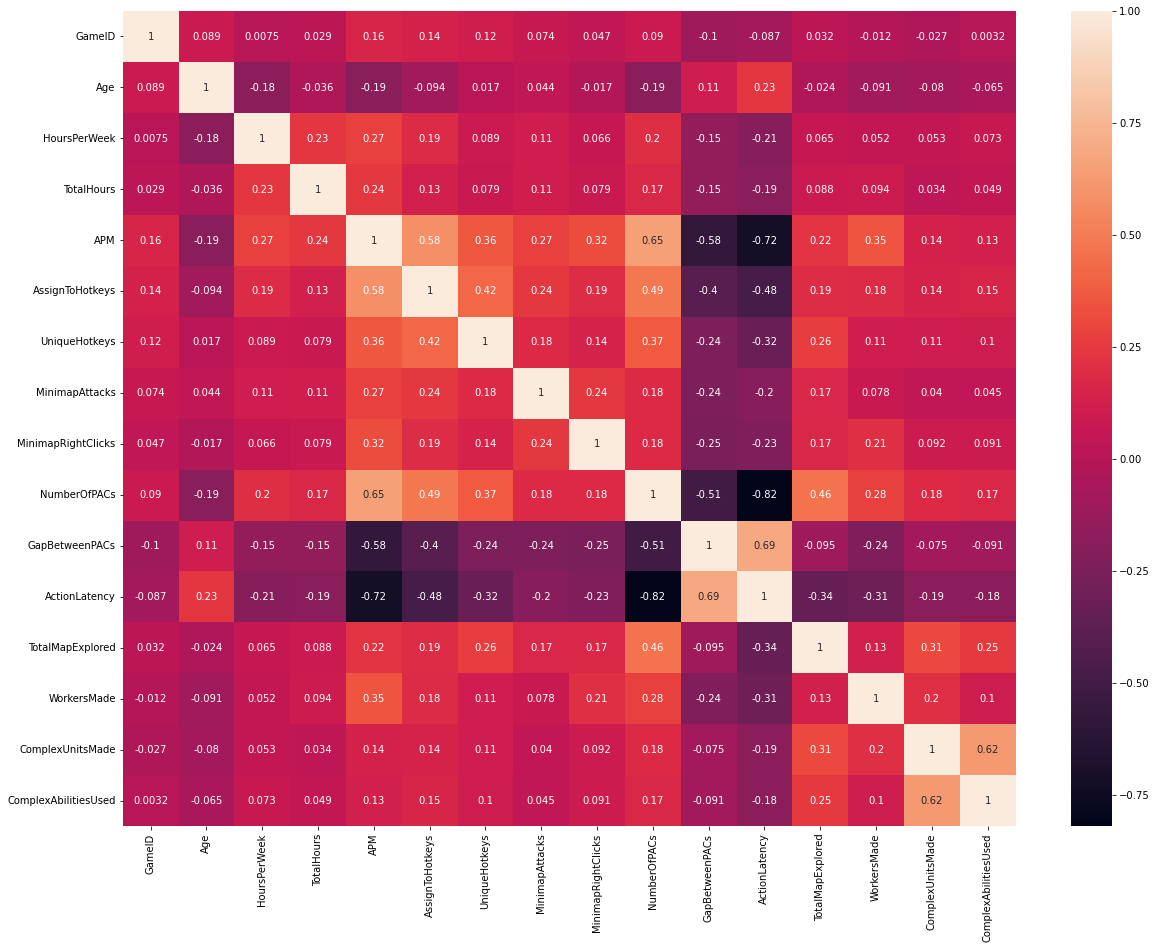

In [30]:
# Lets plot the correlation heatmap to have a rough idea of collinearity between features
plt.figure(figsize=(20, 15))
corr = gamedf_indpt.corr()
sns.heatmap(corr, annot=True)

**Action 3:**

We clearly see now that **NumberOfPACs** is highly correlated to Action Latency. Also **GapBetweenPACs** is highly correlated with **NumberOfPACs**. Also TotalMapExplored is highly correlated with **Action Latency and ComplexUnitsMade**. Hence we remove **NumberofPACs, GapBetweenPACs , TotalMapExplored  and recheck our VIF scores**

In [31]:
# Action 2
gamedf_indpt = gamedf.drop(
    [
        "LeagueIndex",
        "ActionsInPAC",
        "UniqueUnitsMade",
        "SelectByHotkeys",
        "APM",
        "NumberOfPACs",
        "TotalMapExplored",
        "GapBetweenPACs",
    ],
    axis=1,
)
vif_data = pd.DataFrame()
vif_data["feature"] = gamedf_indpt.columns

# calculating VIF for each feature
vif_data["VIF"] = [
    variance_inflation_factor(gamedf_indpt.values, i)
    for i in range(len(gamedf_indpt.columns))
]
vif_data.sort_values(["VIF"], ascending=False)

,feature,VIF
1,Age,21.858142
8,ActionLatency,12.167992
5,UniqueHotkeys,5.428289
4,AssignToHotkeys,5.222102
9,WorkersMade,5.024377
0,GameID,4.185673
2,HoursPerWeek,2.947726
7,MinimapRightClicks,2.313338
10,ComplexUnitsMade,2.156642
11,ComplexAbilitiesUsed,2.101655


### Takeaway:

We can see that we were able to significanly remove multicollinearity in the data however Age vif is still on the higher side.

**Action 4:** Still I was hoping that above mentioned steps would solve out problem of multicollinearity. Here we can still see that still Age having high VIF factor. As most of the variance from Age variable is explained by other features, we can remove Age without losing significant information for our model or we can creates bucketing of these feature. Like Age16-Age20, Age 20-Age 25, Age 25 - Age 30 and so on.

I am keeping this feature for now for further analysis of the data.

We almost removed multicollinearity in the data now moving to next steps.

In [32]:
# Game df after removing highly collinear feature set

# Lets plot the correlation heatmap to have a rough idea of collinearity between features
col_to_drop = [
    "ActionsInPAC",
    "UniqueUnitsMade",
    "SelectByHotkeys",
    "APM",
    "NumberOfPACs",
    "TotalMapExplored",
    "GapBetweenPACs",
]
gamedf.drop(col_to_drop, axis=1, inplace=True)

# Task 3

Determine what are the most important features that could help predict a player’s rank?
Interpret your results for a general audience (coaching staff, pro players, etc).

A point to be noted: According to our objective we should perform multicollinearity checks and treatment. If we want to go with linear models for better interpretibility multicollinearity removal is a necessary step however if we are focusing on prediction accuracy solely, general tree based model are not affected by multicollinearity, there we can skip this step and later remove certain features using backword elimination, permutation feature selection or other techniques. Note removal of features without thorugh experimentation can led to information loss for the modelwhich could have been useful for the model to understand complex pattern using some data combination. 

<AxesSubplot:>

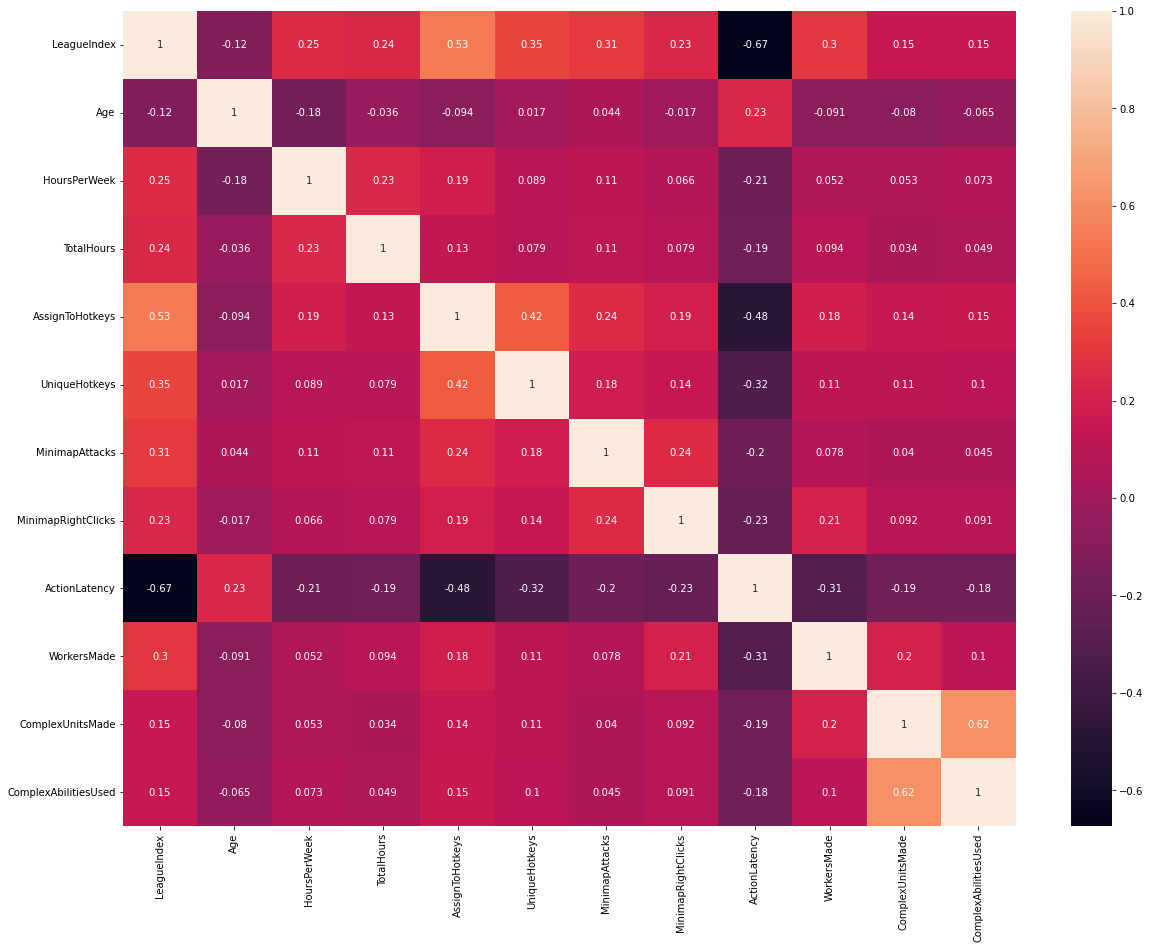

In [33]:
# Lets start by plotting the correlation heatmap again for building certain hypothesis
plt.figure(figsize=(20, 15))

corr = gamedf.drop(["GameID"], axis=1).corr()
sns.heatmap(corr, annot=True)

**Initial Hypothesis:**

abs(corr)>=0.3 is considered as significant correlation between different features.


From the above correlation heatmap we can draw some hypothesis:

1. Action latency significantly seems to have significant negetive correlation with our target variable. This is kind of very obvious that lower the action latency a player has, the better the player is and better the chances to be playing in higer leagues.


2. Total hours/ hours per week seems to have decent correlation value with our target. The hypothesis here is that more practise a player does, the better he performs in the leagues and has more chances to be in the higher leagues. Although its alone not significant.


3. AssignToHotKeys have a correlation value of 0.53 with the target. This implies that plyer having higher number of units or buildings assigned to hotkeys per timestamp have better chances to play in the higer leagues.


4. Minimapattacks, WorkersMade also have high correlation hence can be an important predictor for our target

Lets perform some EDA to have test our hypothesis:

Text(0, 0.5, 'ActionLatency')

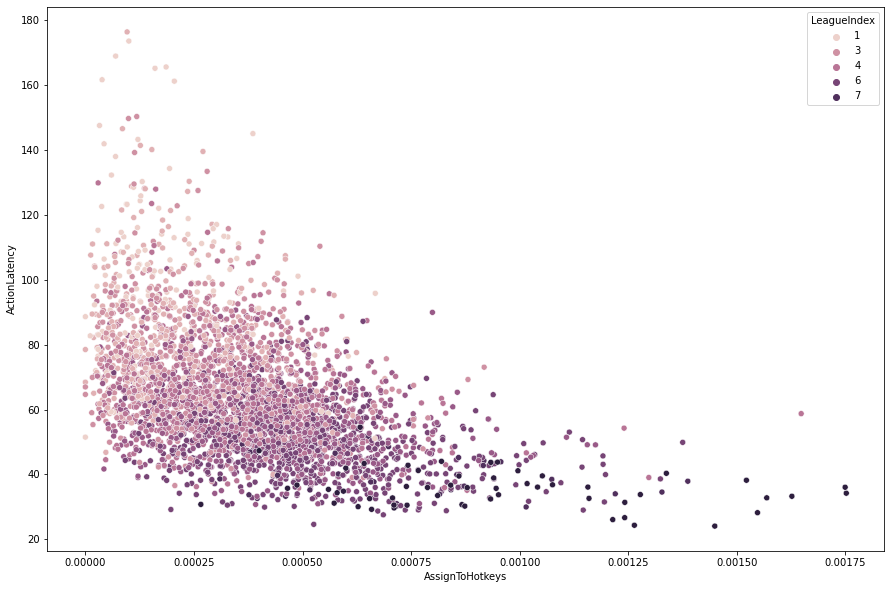

In [34]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data=gamedf, x="AssignToHotkeys", y="ActionLatency", hue="LeagueIndex")
plt.xlabel("AssignToHotkeys")
plt.ylabel("ActionLatency")

### Takeaway: 

We can see that players with higher number of units or buildings assigned to hotkeys per timestamp and lower action latency seems to perform better and belong to higer leagues and vice versa. Hence this features are important predictors

<AxesSubplot:xlabel='LeagueIndex', ylabel='WorkersMade'>

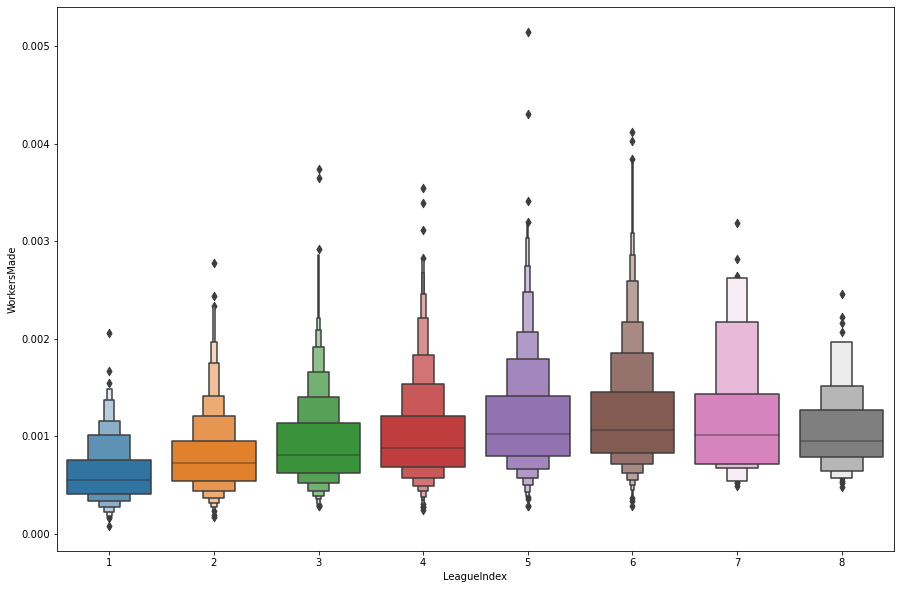

In [35]:
# Can also be taken as part of task 2 in the code below
plt.figure(figsize=(15, 10))
sns.boxenplot(data=gamedf, x="LeagueIndex", y="WorkersMade", k_depth="trustworthy")

Different league players have different pattern of training Number of SCVs, drones, and probes per timestamp. Higher league players tend to have slightly higher medians while the variance in league 8 is quite low with some strategy involved. Hence this might be an imortant predictor.

# Task 4

Your team’s Starcraft2 coaching staff loved your project! They think this is perfect for
scouting rising stars. Using your discoveries from (3), create a function to find players
who should be given a chance to become professionals. Explain why your set of players
make sense?

Rising starts can be of two kinds:
1. Players with sufficient experience in the game but who have not yet been scouted by teams.
2. Players who are new to the game but exhibit mechanical skills, high muscle memory and game awareness which prove that they have the scope for growth if nurtured or given enough time.

Since we are looking to scout rising stars who can help boost our roster, based on our risk apetite we can have a mix of players from the above scenarios.

To make sure we get the best talent we first look for players who match the features of the top 25% of the professional players and slowly increase our scope. Top 25% percentile is taken as baseline because there a lot of things are on stake in professional games hence we need to be careful with the selection.

There is one more aspect which is out of scope of the data that is given to us i.e. the game synergy between team members. It is possible that a player is very good as an individual but might not perform well in a team. That is good thing to check if data is available.

**Important Assumptions:**

**1 I am assuming all the players are Genuine because I didnt find any extreme outliers in players ability features**

**2 As the data given is on gameid level, I will consider single gaming performance as the identifying factor. Ideally multiple gaming performance, consistency, team collaboration all these factors also determine whether a rising star should be given a chance to become a professional**

Steps performed for building the function:

We will create a scaled composite score as a measure to select potential professional players out of our talent pool for achieving this objective.

1. We will seperate the professional players data and the talent pool data
2. We will initialize a loop for each of our most important predictor which will flag (refer col + '_Score' below) the talent pool players having feature value either 5% less than the 75th percentile value of that feature for a professional player or greater. This will be a binary flag between 0 and 1
3. Then we will create a weighted score which will be equal to the sum of abs correlation values of those featueres with target * the flag value for that player.
4. Then we will scale those feature weighted score on a 5 point scale and name it as {feature}+_ScaledScore
5. Then we can pick the top 1 percentile of players with highest scaled score and then take top 5 potential players

In [40]:
def get_rising_star(
    gamedf, quantile_cutoff=0.75, feature_similarity_cutoff=0.95, correl_cutoff=0.3
):
    """
    gamedf = Input clean game df
    quantile_cutoff = Quantile value taken for professional players's playing ability features as cutoff
    feature_similarity_cutoff = Leway given to the above score. For example if we want to give 5% leway then 0.95
                                to the feature value
    correl_cutoff = Cutoff of correlation of feature with target
    """
    professionals = gamedf.copy()[gamedf["LeagueIndex"] == 8]
    talentpool = gamedf.copy()[gamedf["LeagueIndex"] < 8]

    corr = gamedf.drop(["GameID"], axis=1).corr()
    # Statistically taking features having more than or equal to 0.3 correlation with our target
    imp_col = list(
        corr[
            (corr["LeagueIndex"] != 1)
            & (round(abs(corr["LeagueIndex"]), 1) >= correl_cutoff)
        ].index
    )

    max_score = 0
    for col in imp_col:

        # As action latency is negetively correlated to our target the top 75th percentile value
        # will be considered as the 25th percentile for this feature.
        if col == "ActionLatency":
            hl_median_val = professionals[col].quantile(1 - quantile_cutoff)
            # Giving a 5% leway to the median value
            talentpool[col + "_Score"] = np.where(
                talentpool[col] < feature_similarity_cutoff * hl_median_val, 1, 0
            )
            talentpool[col + "_WeightedScore"] = talentpool[col + "_Score"] * abs(
                corr["LeagueIndex"].loc[col]
            )
        else:
            hl_median_val = professionals[col].quantile(quantile_cutoff)
            talentpool[col + "_Score"] = np.where(
                talentpool[col] > feature_similarity_cutoff * hl_median_val, 1, 0
            )
            talentpool[col + "_WeightedScore"] = talentpool[col + "_Score"] * abs(
                corr["LeagueIndex"].loc[col]
            )

        max_score += abs(corr["LeagueIndex"].loc[col]) * 1

    # Getting all the columns with weighted score
    imp_col_ws = list(map(lambda x: x + "_WeightedScore", imp_col))
    talentpool["Player_WScore"] = talentpool[imp_col_ws].sum(axis=1)
    talentpool["Player_ScaledScore"] = (talentpool["Player_WScore"] / max_score) * 5

    # Picking all the players ending up in top 1 percentile value
    talentpool_top1percent = talentpool[
        talentpool["Player_ScaledScore"] > talentpool.Player_ScaledScore.quantile(0.99)
    ].sort_values("Player_ScaledScore", ascending=False)
    top_5_players = talentpool_top1percent.head()
    return talentpool_top1percent, top_5_players

In [42]:
top_1_percentile, top_5_players = get_rising_star(gamedf, quantile_cutoff=0.75)
display(top_5_players)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,ActionLatency,WorkersMade,ComplexUnitsMade,ComplexAbilitiesUsed,AssignToHotkeys_Score,AssignToHotkeys_WeightedScore,UniqueHotkeys_Score,UniqueHotkeys_WeightedScore,MinimapAttacks_Score,MinimapAttacks_WeightedScore,ActionLatency_Score,ActionLatency_WeightedScore,WorkersMade_Score,WorkersMade_WeightedScore,Player_WScore,Player_ScaledScore
464,1352,6,18.0,28.0,1000.0,0.000673,10,0.000133,0.001143,28.7342,0.001510,0.000153,0.000796,0,0.000000,1,0.351213,0,0.000000,1,0.673939,1,0.295643,1.320795,3.051090
2969,8239,6,16.0,20.0,800.0,0.001146,7,0.000008,0.000910,29.0302,0.001079,0.000059,0.000101,1,0.531125,0,0.000000,0,0.000000,1,0.673939,0,0.000000,1.205064,2.783746
2330,6531,6,22.0,42.0,3000.0,0.001195,10,0.000501,0.000819,31.5252,0.000839,0.000000,0.000000,1,0.531125,1,0.351213,1,0.312544,0,0.000000,0,0.000000,1.194883,2.760228
537,1559,6,18.0,20.0,800.0,0.000526,6,0.000016,0.000704,24.6326,0.001489,0.000146,0.000194,0,0.000000,0,0.000000,0,0.000000,1,0.673939,1,0.295643,0.969581,2.239772
2611,7309,6,17.0,10.0,700.0,0.000686,5,0.000104,0.001798,27.5645,0.001381,0.000174,0.000443,0,0.000000,0,0.000000,0,0.000000,1,0.673939,1,0.295643,0.969581,2.239772


According to me the above players can be given a chance to become professionals in the order of top to bottom as they are in the top 1 percentile of the talentpool as players and highest Player_ScaledScore.

Lets take the example of the first player in the above dataframe. That player have extremely low action latency, high UniqueHotKey, WorkersMade value similar to a top professional player. Similarly we can compare the traits of the above listed players with attribute to top professional players to reach this conclusion.

# Task 5

Hypothetically, if you were to move forward with creating a fully-fledged model to predict
LeagueIndex, what model(s) would you consider and why? (Don’t actually implement
anything!)

As we have defined classes in LeagueIndex (our target) it will be a better idea to build a multiclass classification model. The modelling choice solely depends upon the objective. 

Also Machine learning is purely experimental, we can judge which model might perform better on the data given the complexity and objectives but we need to still experiment around to check while models reaches the business benchmarks in terms of performance & consistency.

Below are some techniques we can implement:

1. If our objective is to understand and quantify how a particular feature helps in predicting out target i.e. leagueindex then we can go for simple linear based models. 

   --> For example if we want to understand the elasticities of different features then we should go with logistic      regression model.
   
   --> From there we can get the beta estimates to understand how our log(odds) changes by changing any feature value keeping other as constant. Hence we can go for multiclass logistic regression model.


2. If our goal is high accuracy in terms of predicting our target and explainability is not our final objective, then we can try different models like SVM, Random Forest, Xgboost, LightGBM, Voting Classifier, Adaboost & Catboost. 

   --> First we need to see if our dependent variable is balanced if not we will take F1-Score as our matrix tune our models and select the best model as out champion model.

   --> Also we can try **oversampling technique** of our target is not balanced. Also we need to check our model performance on validation and the hold out test set to have confidence whether out model doesn't underfit/overfit.

   --> We need to make sure we do a **stratified sampling** for splitting our data into validation and test set so that we dont induce biasness to our model. As the data is small its always a good idea to build a very generalized model.
   
   --> Interpretation of features impace is still possible to some extent by building simulators or by analysing shaply values.

I hoped you liked my analysis. 

**Have an Evil Day 😈**